# Saravanan, Karthik Sundaram Homework 4

**Due Monday 1st April in class**

In this homework you will compute the posterior distribution for a Poisson likelihood with a gamma prior using:
* Model Conjugacy
* Numerical Integration
* Metropolis Hastings Algorithm

All of these methods should give the same answer (up to numerical approximation). In practice, one would use the conjugate model result to derive the posterior because this method is computationally fastest. However the  methods of numerical integration and Metropolis Hastings are more general in that they could be used on other, non-conjugate models. Metropolis Hastings is particularly useful because it can be used for problems where the parameter dimension is too high for direct numerical integration. 

## Problem 1

Suppose we observe $X_1,\ldots,X_n \sim \text{Pois}(\lambda)$ where $\text{Pois}(\lambda)$ denotes a Poisson distribution with mean parameter $\lambda$. Specifically
$$ P(X=x|\lambda)  = \frac{\lambda^x e^{-\lambda}}{x!}$$
for $x=0,1,\dots$. We put a $Gamma(\alpha,\beta)$ prior on $\lambda$, which we denote by $\pi(\lambda)$. This prior has the form
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda}$$
for $\lambda > 0$. Recall that $\alpha, \beta > 0$ are fixed, known constants.

1. Using a few lines of algebra determine the posterior distribution.
2. Plot the Gamma prior probability density with $\alpha=3$, $\beta=1/2$ and plot the corresponding posterior density assuming $n=10$ and 
 $(x_1,\dots,x_n) = (4,5,1,3,3,1,4,5,0,5)$



Note: In python,`np.random.gamma` and `scipy.stats.gamma` use the scale parameterization. We use the rate parameterization: rate = 1/scale. R has options for both rate and scale parameterization in `rgamma`, `dgamma`, etc. See [here](https://en.wikipedia.org/wiki/Exponential_distribution) and [here](https://en.wikipedia.org/wiki/Gamma_distribution) for some discussion of different parameterizations.

### Problem 1.1

$$ P(\lambda|x)  \propto P(x|\lambda) P(\lambda)$$

$$                                  \propto \frac{\lambda^{\sum_i x_i} e^{-n \lambda}}{\prod_i x_i} \lambda^{\alpha-1} e^{-\beta\lambda}$$

$$                                  \propto \lambda^{({\sum_i x_i} + \alpha) - 1} e^{-\lambda{(n + \beta)}} $$
This is the posterior distribution

### Problem 1.2

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = [4,5,1,3,3,1,4,5,0,5]
n = len(x)
x

[4, 5, 1, 3, 3, 1, 4, 5, 0, 5]

In [3]:
np.mean(x)

3.1

In [4]:

alp = 3
bet = 1/2

In [5]:
alphadash = np.sum(x) + alp
betadash = n + bet

In [6]:

plt.rcParams['figure.figsize'] = (11, 3)

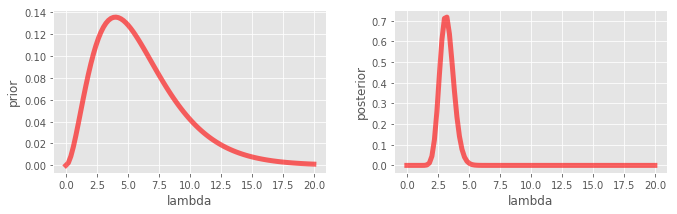

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lambda2 = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda2, scipy.stats.gamma.pdf(lambda2,a=alp,scale=1/bet),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='prior');


### plot the posterior
ax = fig.add_subplot(1, 2, 2)
ax.plot(lambda2, scipy.stats.gamma.pdf(lambda2,a=alphadash,scale=1/betadash),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

In [8]:
#mean of the new posterior gamma distribution
alphadash/betadash

3.238095238095238

## Problem 2

Recall that the posterior is proportional to the likelihood times the prior
$$ \pi(\lambda|x) \propto f(x|\lambda)\pi(\lambda)$$
Here $x=(x_1,\ldots,x_n)$ and $f(x|\lambda) = \lambda^{\sum_i x_i} e^{-n\lambda}/(\prod_i x_i!)$ is the joint probability density function, i.e., the likelihood when viewed as a function of $\lambda$. Plot $f(x|\lambda)\pi(\lambda)$ (or something proportional to it) for the $Gamma(\alpha=3,\beta=1/2)$ prior and data from the previous question. Numerically integrate this function and use the result to normalize $f(x|\lambda)\pi(\lambda)$. Verify that the result matches the posterior you found in Problem 1.

In [9]:
from scipy.stats import beta
from scipy.special import factorial

In [10]:
def posterior_p(lambda2):
    return scipy.stats.gamma.pdf(lambda2,a=alp,scale=1/bet)*np.power(lambda2,np.sum(x))*np.exp(-lambda2*n)/np.prod(factorial(x))

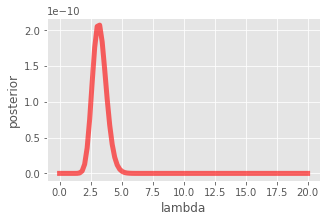

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lambda2 = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda2, posterior_p(lambda2),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

In [12]:
fmax = np.max(posterior_p(lambda2))
print(fmax)

2.0697011969566493e-10


In [13]:
def posterior_p(lambda2):
    return scipy.stats.gamma.pdf(lambda2,a=alp,scale=1/bet)*np.power(lambda2,np.sum(x))*np.exp(-lambda2*n)/np.prod(factorial(x))/fmax

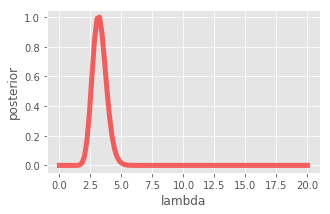

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lambda2 = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda2, posterior_p(lambda2),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

In [15]:
import scipy.integrate as integrate

In [16]:
mx = integrate.quad(lambda p: posterior_p(p), 0, 20)

In [17]:
mx

(1.3930065636455444, 2.916951382885103e-09)

In [18]:
mx = mx[0]
mx

1.3930065636455444

In [19]:
def posterior_p(lambda2):
    return scipy.stats.gamma.pdf(lambda2,a=alp,scale=1/bet)*np.power(lambda2,np.sum(x))*np.exp(-lambda2*n)/np.prod(factorial(x))/(fmax*mx)

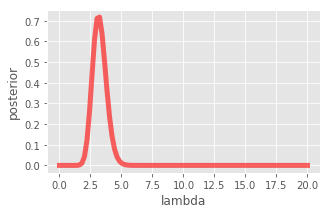

In [20]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

lambda2 = np.linspace(0,20,100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambda2, posterior_p(lambda2),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlabel='lambda', ylabel='posterior');

In [21]:
import pandas as pd
max(posterior_p(lambda2))
df = pd.DataFrame(list(zip(lambda2,posterior_p(lambda2))),columns=["lambda","posterior"])
df.loc[df['posterior']==max(df['posterior']),'lambda']

16    3.232323
Name: lambda, dtype: float64

### The above mean (lambda) matches with the resulting mean from problem 1;
### The posterior also looks similar to problem 1

## Problem 3

Write (or adapt code from class) a Metropolis Hastings algorithm to sample from the posterior. Draw a histogram of the samples and verify that they approximately match the posterior determined using conjugacy or numerical integration. Compute the posterior mean and make a 95% credible interval for $\lambda$ (you can make this interval in many ways, but the most popular method is to compute the 0.025 and .975 quantiles of the posterior samples). You can verify that you have the right answer by computing the interval from the conjugacy result in Problem 1.

In [22]:
Niter = 50000
chain = np.zeros(Niter)
chain[0] = 0.3

In [23]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.5,size=1)
        if (posterior_p(prop) / posterior_p(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

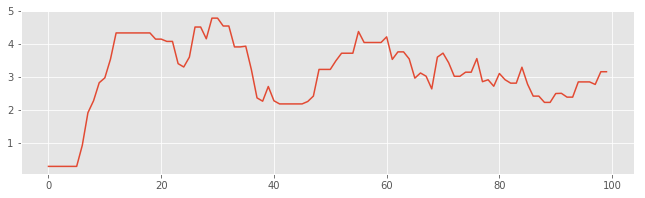

In [24]:
fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(100), chain[:100]);

In [25]:
## remove the first 1000 iterations to get rid of burn in
chain = chain[1000:]

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


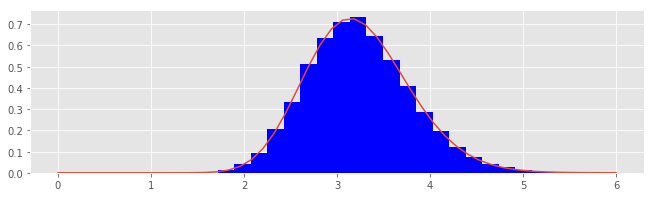

In [26]:
fig = plt.figure()
ax = plt.axes()
ns, bins, rectangles = ax.hist(chain,25,normed=True,color='blue')
p = np.linspace(.5,.85,100);
lambda2 = np.linspace(0,6)
plt.plot(lambda2, scipy.stats.gamma.pdf(lambda2,a=alphadash,scale=1/betadash));

In [27]:
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index

In [28]:
print(chain_s[ixL])
print(chain_s[ixU])

2.2389230412958994
4.436223226049301


In [29]:
np.mean(chain)

3.2376040907197474

### verifying with the result from problem 1

In [30]:
lhs = scipy.stats.gamma.ppf(0.025, a=alphadash, scale=1/betadash)
rhs = scipy.stats.gamma.ppf(0.975, a=alphadash, scale=1/betadash)
print(lhs)
print(rhs)

2.242475084244978
4.4137399303970755


In [31]:
alphadash / betadash

3.238095238095238